In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv') # считываем датафрейм
df

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,New building,Котельники,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


Посмотрим на датафрейм: 11 признаков, 1 целевая переменная - price
Датасет содержит как числовые, так и категориальные переменные - одной из задач будет понять, как лучше закодировать категориальные переменные

Посмотрим на вариативность значений категориальных признаков:

In [ ]:
df_columns = ['Apartment type', 'Metro station', 'Region', 'Renovation']
for i in df_columns:
  print(df[i].value_counts())
df_columns.append('Price')

Apartment type
Secondary       13152
New building     9524
Name: count, dtype: int64
Metro station
Красногвардейская            2697
Депо                         1646
Братиславская                1157
Котельники                    981
Жулебино                      731
                             ... 
 Каховская                      1
 Вешняки                        1
 Текстильщики                   1
 Марксистская                   1
 Улица Академика Королёва       1
Name: count, Length: 547, dtype: int64
Region
Moscow           16113
Moscow region     6563
Name: count, dtype: int64
Renovation
Cosmetic                     12788
European-style renovation     3666
Without renovation            3198
Designer                      3024
Name: count, dtype: int64


Количество станций метро слишком большое - идея кодирования станций состоит в том, чтобы закодировать станцию как ветку метро, к которой эта станция принадлежит.

Для этого я создал таблицу, с помощью которой можно выполнить коидировку


In [ ]:
metro = pd.read_excel('/content/drive/MyDrive/метро таблица.xlsx')
metro

,Арбатско-Покровская линия,Большая кольцевая линия,Бутовская линия,Замоскворецкая линия,Калининская линия,Калужско-Рижская линия,Кольцевая линия,Люблинско-Дмитровская линия,Московский монорельс,Московское центральное кольцо,Некрасовская линия,Серпуховско-Тимирязевская линия,Сокольническая линия,Таганско-Краснопресненская линия,Филёвская линия,Солнцевская линия,МЦД-1,МЦД-2,МЦД-3,МЦД-4
0,Пятницкое шоссе,Савеловская,Битцевский парк,Ховрино,Третьяковская,Медведково,Парк культуры,Физтех,Тимирязевская,Окружная,Нижегородская,Алтуфьево,Бульвар Рокоссовского,Планерная,Кунцевская,Аэропорт Внуково,Одинцово,Нахабино,Фирсановская,Железнодорожная
1,Митино,Петровский Парк,Лесопарковая,Беломорская,Марксистская,Бабушкинская,Октябрьская,Лианозово,Улица Милашенкова,Владыкино,Стахановская,Бибирево,Черкизовская,Сходненская,Пионерская,Пыхтино,Баковка,Аникеевка,Сходня,Ольгино
2,Волоколамская,ЦСКА,Старокачаловская,Речной вокзал,Площадь Ильича,Свиблово,Добрынинская,Яхромская,Телецентр,Ботанический сад,Окская,Отрадное,Преображенская площадь,Тушинская,Филёвский парк,Рассказовка,Сколково,Опалиха,Подрезково,Кучино
3,Мякинино,Хорошевская,Улица Скобелевская,Водный стадион,Авиамоторная,Ботанический сад,Павелецкая,Селигерская,Улица Академика Королёва,Ростокино,Юго-Восточная,Владыкино,Сокольники,Спартак,Багратионовская,Новопеределкино,Немчиновка,Красногорская,Новоподрезково,Салтыковская
4,Строгино,Шелепиха,Бульвар Адмирала Ушакова,Войковская,Шоссе Энтузиастов,ВДНХ,Таганская,Верхние Лихоборы,Выставочный центр,Белокаменная,Косино,Петровско-Разумовская,Красносельская,Щукинская,Фили,Боровское шоссе,Сетунь,Павшино,Молжаниново,Никольское
5,Крылатское,Деловой центр,Улица Горчакова,Сокол,Перово,Алексеевская,Курская,Окружная,Улица Сергея Эйзенштейна,Бульвар Рокоссовского,Улица Дмитриевского,Тимирязевская,Комсомольская,Октябрьское поле,Кутузовская,Солнцево,Рабочий Посёлок,Пенягино,Химки,Реутов
6,Молодежная,Народное Ополчение,Бунинская Аллея,Аэропорт,Новогиреево,Рижская,Комсомольская,Петровско-Разумовская,-,Локомотив,Лухмановская,Дмитровская,Красные ворота,Полежаевская,Студенческая,Говорово,Дегунино,Трикотажная,Левобережная,Кусково
7,Кунцевская,Мнёвники,Улица Старокачаловская,Динамо,Новокосино,Проспект Мира,Проспект Мира,Фонвизинская,-,Измайлово,Некрасовка,Савёловская,Чистые пруды,Беговая,Международная,Озёрная,Бескудниково,Стрешнево,Грачёвская,Чухлинка
8,Славянский бульвар,Терехово (Мнёвники),Бунинская аллея,Белорусская,-,Сухаревская,Новослободская,Бутырская,-,Соколиная Гора,-,Менделеевская,Лубянка,Улица 1905 года,Выставочная,Мичуринский проспект,Марк,Красный Балтиец,Моссельмаш,Серп и Молот
9,Парк Победы,Кунцевская,Битцевский Парк,Маяковская,-,Тургеневская,Белорусская,Марьина Роща,-,Шоссе Энтузиастов,-,Цветной бульвар,Охотный Ряд,Баррикадная,Киевская,Раменки,Новодачная,Гражданская,Останкино,Площадь трёх вокзалов


In [ ]:
branches = ['-' for i in range(df.shape[0])]
stations = list(df['Metro station'])
for i in range(len(stations)):
  stations[i] = stations[i].strip()
for i in range(df.shape[0]):
  for branch in list(metro.columns):
    if stations[i].strip() in list(metro[branch]):
      branches[i] = branch

In [ ]:
df.insert(df.shape[1], 'Metro line number', branches)
df = df[df['Metro line number'] != '-'].reset_index()

if 'index' in df.columns:
  df = df.drop('index', axis=1)

if 'level_0' in df.columns:
  df = df.drop('level_0', axis=1)

df = df.drop('Metro station', axis=1)

df

,Price,Apartment type,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,Metro line number
0,6300000.0,Secondary,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic,МЦД-2
1,9000000.0,Secondary,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation,МЦД-2
2,11090000.0,Secondary,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic,Арбатско-Покровская линия
3,8300000.0,Secondary,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation,Арбатско-Покровская линия
4,6450000.0,Secondary,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation,МЦД-2
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,New building,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic,Таганско-Краснопресненская линия
22672,5900000.0,New building,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic,Замоскворецкая линия
22673,3700000.0,New building,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic,Таганско-Краснопресненская линия
22674,5768869.0,New building,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic,Таганско-Краснопресненская линия


Посмотрим, насколько кореллируют признаки не только с целевой переменной, но и между собой

In [ ]:
df_copy = df.copy()
df_copy = pd.get_dummies(df_copy)
df_copy[df_copy.columns[:10]].corr()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Apartment type_New building,Apartment type_Secondary
Price,1.000000,-0.105382,0.490820,0.794226,0.709296,0.582940,0.019080,-0.022134,-0.287179,0.287179
Minutes to metro,-0.105382,1.000000,-0.082357,-0.094937,-0.085614,-0.062436,0.017230,-0.031209,-0.041318,0.041318
Number of rooms,0.490820,-0.082357,1.000000,0.687145,0.657565,0.476534,0.087446,0.074045,-0.237795,0.237795
Area,0.794226,-0.094937,0.687145,1.000000,0.906604,0.731963,0.083480,0.044465,-0.272074,0.272074
Living area,0.709296,-0.085614,0.657565,0.906604,1.000000,0.610039,0.072477,0.036737,-0.274719,0.274719
Kitchen area,0.582940,-0.062436,0.476534,0.731963,0.610039,1.000000,0.133737,0.108035,-0.177350,0.177350
Floor,0.019080,0.017230,0.087446,0.083480,0.072477,0.133737,1.000000,0.596803,0.059943,-0.059943
Number of floors,-0.022134,-0.031209,0.074045,0.044465,0.036737,0.108035,0.596803,1.000000,-0.070520,0.070520
Apartment type_New building,-0.287179,-0.041318,-0.237795,-0.272074,-0.274719,-0.177350,0.059943,-0.070520,1.000000,-1.000000
Apartment type_Secondary,0.287179,0.041318,0.237795,0.272074,0.274719,0.177350,-0.059943,0.070520,-1.000000,1.000000


Видим большую корреляцию (0.9) между площадью квартиры и жилой площадью, поэтому, удалим столбец "Living area"

In [ ]:
df = df.drop('Living area', axis=1)

Исследуем данные в датасете: наличие выбросов, распределение и т.п.

Визуализируем количество выбросов

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Initial Price Distribution')

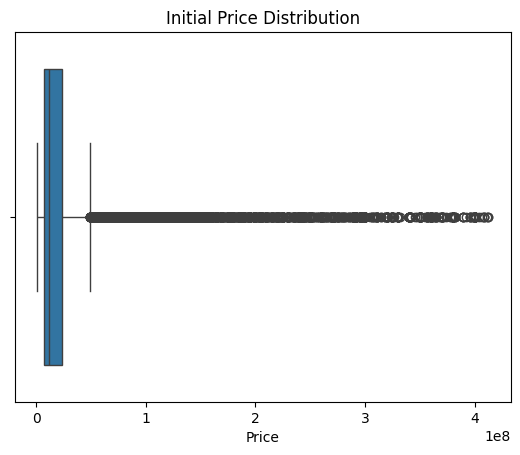

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
boxb = sns.boxplot(data=df, x='Price')
boxb.set_title('Initial Price Distribution')

Количество выбросов очень большое, что в принципе логично: большинство цен на квартиры находится в диапазоне 10-50 миллионов, но при этом есть немалое количество квартир > 100 миллионов

Напишем функцию для исследования выбросов методом межквартильного размаха:

In [ ]:
def outliers_iqr(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [ ]:
outliers, cleaned = outliers_iqr(df, 'Price')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 3340
Результирующее число записей: 19336


Визуализируем распределение данных и итоговое количество выбросов

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


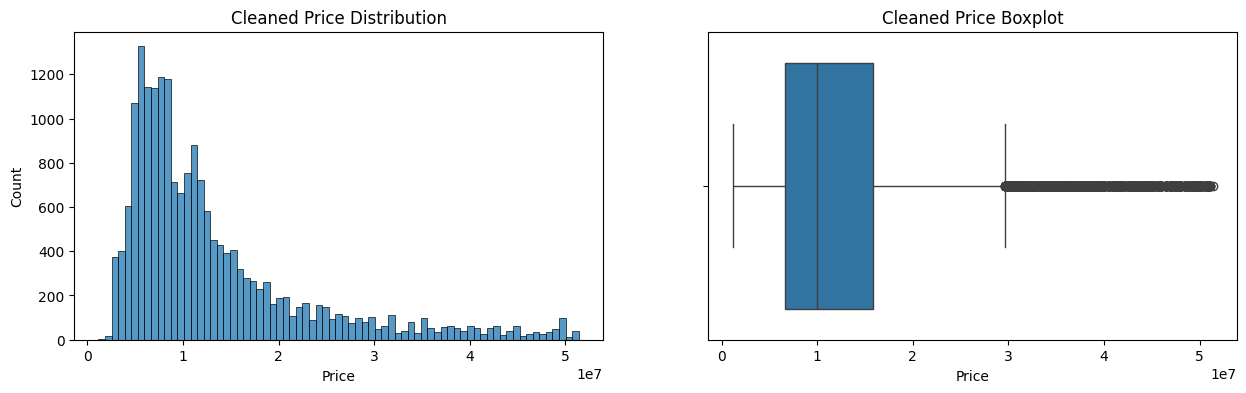

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='Price', ax=axes[0]);
histplot.set_title('Cleaned Price Distribution');
boxplot = sns.boxplot(data=cleaned, x='Price', ax=axes[1]);
boxplot.set_title('Cleaned Price Boxplot');

Выбросов стало меньше, но распределение далеко от нормального

Когда распределение далеко от нормального, можно использовать метод z-отклонений: иногда для распределений, похожих на логнормальное, может помочь логарифмирование. Оно может привести исходное распределение к подобию нормального. Причем, основание логарифма может быть любым.

In [ ]:
def outliers_z_score(data, feature, log_scale=False, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

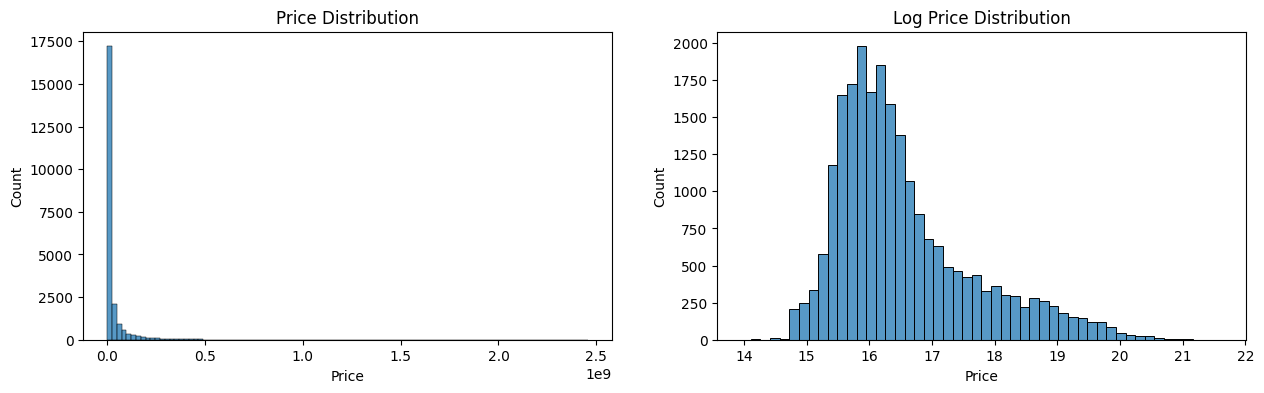

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

histplot = sns.histplot(df['Price'], bins=100, ax=axes[0])
histplot.set_title('Price Distribution');

#гистограмма в логарифмическом масштабе
log_price = np.log(df['Price'] + 1)
histplot = sns.histplot(log_price, bins=50, ax=axes[1])
histplot.set_title('Log Price Distribution');

In [ ]:
outliers_z, cleaned_z = outliers_z_score(df, 'Price', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers_z.shape[0]}')
print(f'Результирующее число записей: {cleaned_z.shape[0]}')

Число выбросов по методу z-отклонения: 199
Результирующее число записей: 22477


Видим, что асимметрия сильно снизилась и распределение данных стало сильно больше похоже на нормальное.

К тому же, забегая вперёд, протестив разные виды очистки выбросов, метод z-отклонений показал лучший результат

In [ ]:
df = cleaned_z
df

,Price,Apartment type,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,Metro line number
0,6300000.0,Secondary,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic,МЦД-2
1,9000000.0,Secondary,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation,МЦД-2
2,11090000.0,Secondary,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic,Арбатско-Покровская линия
3,8300000.0,Secondary,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation,Арбатско-Покровская линия
4,6450000.0,Secondary,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation,МЦД-2
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,New building,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic,Таганско-Краснопресненская линия
22672,5900000.0,New building,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic,Замоскворецкая линия
22673,3700000.0,New building,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic,Таганско-Краснопресненская линия
22674,5768869.0,New building,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic,Таганско-Краснопресненская линия


In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
X_cols = X.columns

In [ ]:
X

,Apartment type,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,Metro line number
0,Secondary,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic,МЦД-2
1,Secondary,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation,МЦД-2
2,Secondary,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic,Арбатско-Покровская линия
3,Secondary,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation,Арбатско-Покровская линия
4,Secondary,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation,МЦД-2
...,...,...,...,...,...,...,...,...,...,...,...
22671,New building,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic,Таганско-Краснопресненская линия
22672,New building,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic,Замоскворецкая линия
22673,New building,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic,Таганско-Краснопресненская линия
22674,New building,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic,Таганско-Краснопресненская линия


Применим OHE кодирование и нормализуем данные с помощью MinMaxScaler [0;1]

In [ ]:
X = pd.get_dummies(X)
X_cols = X.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

В этой задаче данные не далеки от нормального распределения, поэтому линейная регрессия будет давать плохие метрики

Используем модель случайного леса с подобранными с помощью GridSearchCV параметрами

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75, random_state=42)
#params = {'n_estimators': np.arange(20, 200, 20), 'max_depth': (5, 20, 3)}
#params = {'max_features': [None, 'sqrt', 'log2']}

#gs = GridSearchCV(RandomForestRegressor(max_depth=20, n_estimators=160), params, cv=3, scoring='r2', verbose=1)
#gs.fit(Xtrain, ytrain)
#print(gs.best_score_, gs.best_estimator_)
#0.8589177234650475 RandomForestRegressor(max_depth=20, n_estimators=160)

In [ ]:
gs = RandomForestRegressor(max_depth=20, n_estimators=160)
gs.fit(Xtrain, ytrain)
# ypred = gs_model.predict(Xtest)
# y_train_pred = gs_model.predict(Xtrain)

ypred = gs.predict(Xtest)
y_train_pred = gs.predict(Xtrain)

print(f'MAE: {mean_absolute_error(ytest, ypred)}')
print(f'MAPE: {mean_absolute_percentage_error(ytest, ypred)}')
print(f'R^2 score train: {r2_score(ytrain, y_train_pred)}')
print(f'R^2 score test: {r2_score(ytest, ypred)}')

MAE: 6582632.864525974
MAPE: 0.14434879243146953
R^2 score train: 0.9831534860000469
R^2 score test: 0.8731611226016691


Пример работы модели

In [ ]:
GT = pd.DataFrame(X)
vv = GT.iloc[1006]
print(f'предсказанная цена: {int(gs.predict(np.array(vv).reshape(1, -1)))}, настоящая: {y[1006]}')

предсказанная цена: 10739645, настоящая: 10450326.0


<ipython-input-46-1585d1f3ac9e>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'предсказанная цена: {int(gs.predict(np.array(vv).reshape(1, -1)))}, настоящая: {y[1006]}')


Сравним показатели нескольких моделей: также используем модель CatBoost и LightGBM

In [ ]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [ ]:
categorial_features_indices = np.where(X.dtypes != float)[0]
categorial_features_indices

array([ 0,  2,  8,  9, 10])

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75, random_state=42)

In [ ]:
from catboost import CatBoostRegressor, Pool, metrics, cv
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
model = CatBoostRegressor(
    loss_function='RMSE',
    logging_level='Silent',
    max_depth=11
)

#from sklearn.model_selection import GridSearchCV
#params = {'max_depth': [2, 5, 8, 11]}
#cb = GridSearchCV(CatBoostRegressor(), params, cv=3, scoring='r2', verbose=2)
#cb.fit(Xtrain, ytrain, cat_features=categorial_features_indices, early_stopping_rounds=100)

In [ ]:
#cb.best_score_, cb.best_params_

(0.8588181183512891, {'max_depth': 11})

In [ ]:
model.fit(
    Xtrain, ytrain,
    #cat_features=categorial_features_indices,
    eval_set=(Xtest, ytest),
    verbose=100,
    early_stopping_rounds = 100
#    plot=True
)

In [ ]:
ypred = model.predict(Xtest)
from sklearn.model_selection import cross_val_score
#print(cross_val_score(model, X, y, cv=3, scoring='r2'))
print(f'CatBoost MAE: {mean_absolute_error(ytest, ypred)}')
print(f'CatBoost train r2: {r2_score(ytrain, model.predict(Xtrain))}')
print(f'CatBoost test r2: {r2_score(ytest, ypred)}')

CatBoost MAE: 6050414.795606725
CatBoost train r2: 0.9973454329270925
CatBoost test r2: 0.8891344613307584


Посмотриим на корреляцию признаков относительно получения итогового результата модели

In [ ]:
feature_importances = model.get_feature_importance()
feature_names = X_cols
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

In [ ]:
!pip install lightgbm -q

In [ ]:
np.linspace(0.01, 0.2, 20)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

Найдем лучшие параметры для модели LightGBM

In [52]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75, random_state=42)

lgbm = LGBMRegressor()
params = {'max_depth': [2, 5, 8, 11], 'learning_rate': np.linspace(0.01, 0.2, 20), 'n_estimators': [80, 100, 120]}
#gs = GridSearchCV(lgbm, params, cv=3, scoring='neg_mean_absolute_error', verbose=0)
#gs.fit(Xtrain, ytrain)
print(gs.best_estimator_, gs.best_score_)


LGBMRegressor(learning_rate=0.16, max_depth=11, n_estimators=120) -7137356.361846067


In [ ]:
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error
gs = LGBMRegressor(learning_rate=0.2, max_depth=11, n_estimators=120)
gs.fit(Xtrain, ytrain)
ypred = gs.predict(Xtest)
print(f'LightGBM MAE: {mean_absolute_error(ytest, ypred)}')
print(f'LightGBM train r2: {r2_score(ytrain, gs.predict(Xtrain))}')
print(f'LightGBM test r2: {r2_score(ytest, ypred)}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1014
[LightGBM] [Info] Number of data points in the train set: 16857, number of used features: 34
[LightGBM] [Info] Start training from score 30559471.963932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes